In [4]:
import pdftotext

In [5]:
with open("/Users/shiqinchoo/Desktop/summary/mgbio.pdf","rb") as f:
    pdf = pdftotext.PDF(f)

In [6]:
len(pdf)

200

In [7]:
type(pdf)

pdftotext.PDF

In [8]:
str(pdf)

'<pdftotext.PDF object at 0x7fa81130f4e0>'

In [9]:
type(pdf)

pdftotext.PDF

In [10]:
pdf = "\n\n".join(pdf)

In [11]:
f2 = open("/Users/shiqinchoo/Desktop/summary/mgbio2.txt","w+")
f2.write(pdf)
f2.close()

In [12]:
j = open("/Users/shiqinchoo/Desktop/summary/mgclimate/climate2.txt","w+")

In [13]:
with open("/Users/shiqinchoo/Desktop/summary/mgclimate/mgclimate.pdf","rb") as k:
    pdf = pdftotext.PDF(k)

In [14]:
k = "\n\n".join(pdf)

In [15]:
j.write(k)

685510

In [16]:
type(k)

str

In [17]:
import spacy
nlp = spacy.load('/opt/anaconda3/lib/python3.7/site-packages/en_core_web_lg/en_core_web_lg-2.2.5/')
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [18]:
import pandas as pd
import os

In [19]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shiqinchoo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [21]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shiqinchoo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [23]:
import random
#get tokens
text_data=[]
with open('/Users/shiqinchoo/Desktop/summary/mgclimate/climate2.txt','r') as f:
    for line in f:
        tokens = prepare_text_for_lda(line)
        if random.random() > .99:
            print(tokens)
            text_data.append(tokens)

['author']
['university', 'oxford', 'environmental', 'change', 'institute', 'ensure', 'impartiality']
['contents']
['affect', 'region', 'continue', 'examine', 'could', 'experience', 'increase', 'though', 'could', 'prove', 'costly']
[]
['research', 'methodology']
['case', 'illustrate', 'exposure', 'climate', 'change', 'extreme', 'proximity', 'physical']
['critical', 'importance', 'decarbonization', 'climate', 'management', 'approach']
[]
[]
['period', 'dataset', '20‑year', 'period', 'center', '1998–2017', '2041–60']
[]
['exposure', 'example', 'roger', 'pielke', 'tracking', 'progress', 'economic', 'costs', 'disaster']
['base', 'shade', 'globe', 'temperature', 'define', 'apparent', 'temperature', 'usually', 'take', 'account']
['devaluation', 'price', 'lender', 'owner', 'default', 'among']
['infrastructure', 'plan', 'completion', 'shortly', 'could', 'experience', 'another', 'change']
['flood', 'federal', 'subsidy']
['within']
['describe', 'area', 'become', 'hot', 'humid', 'today']
['workin

In [24]:
import gensim
from gensim.utils import simple_preprocess
# Build the bigram and trigram models
bigram = gensim.models.Phrases(text_data, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[text_data], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [25]:
# NLTK Stop words
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [26]:
stop_words = stopwords.words('english')

In [27]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [28]:
import spacy
# Remove Stop Words
data_words_nostops = remove_stopwords(text_data)
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

In [29]:
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [30]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
# Create Corpus
texts = data_lemmatized
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:10])

[[(0, 1)], [(1, 1), (2, 1)], [(3, 1)], [(4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [], [(14, 1), (15, 1)], [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)], [(18, 1), (24, 1), (25, 1), (26, 1), (27, 1)], [], []]


In [31]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [32]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"model" + 0.042*"temperature" + 0.022*"increase" + 0.022*"emission" + '
  '0.022*"carbon" + 0.022*"correct" + 0.022*"uncertainty" + 0.022*"skew" + '
  '0.022*"support" + 0.022*"convexity"'),
 (1,
  '0.068*"share" + 0.046*"climate" + 0.046*"model" + 0.046*"annual" + '
  '0.024*"grain" + 0.024*"result" + 0.024*"early" + 0.024*"shortage" + '
  '0.024*"suggest" + 0.024*"world"'),
 (2,
  '0.055*"scenario" + 0.055*"experience" + 0.029*"infrastructure" + '
  '0.029*"could" + 0.029*"region" + 0.029*"completion" + 0.029*"plan" + '
  '0.029*"frequently" + 0.029*"input" + 0.029*"particular"'),
 (3,
  '0.060*"period" + 0.041*"impact" + 0.021*"cost" + 0.021*"study" + '
  '0.021*"disaster" + 0.021*"economic" + 0.021*"example" + 0.021*"progress" + '
  '0.021*"instance" + 0.021*"present"'),
 (4,
  '0.078*"climate" + 0.040*"shift" + 0.040*"change" + 0.040*"physical" + '
  '0.021*"hazard" + 0.021*"exposure" + 0.021*"take" + 0.021*"entire" + '
  '0.021*"effort" + 0.021*"range"'),
 (5,
  '0.

In [33]:
# supporting function
from gensim.models import CoherenceModel
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [34]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.132229  0.131675       1        1  16.637247
9     -0.097012 -0.084108       2        1  13.820304
4     -0.093726 -0.068632       3        1  10.603703
6      0.132824  0.016193       4        1  10.285423
3      0.079640 -0.101129       5        1   9.797663
0      0.074657  0.072842       6        1   9.503177
5     -0.042544 -0.041114       7        1   8.814371
1      0.005645  0.034041       8        1   8.139380
2      0.046735  0.014293       9        1   6.467136
8      0.026011  0.025939      10        1   5.931595, topic_info=    Category      Freq            Term     Total  loglift  logprob
18   Default  9.000000         climate  9.000000  30.0000  30.0000
174  Default  2.000000           share  2.000000  29.0000  29.0000
65   Default  3.000000           model  3.000000  28.0000  28.0000
17   Default  6.000000          change  6.000000  27.0000  27.0000
29   Default  2.000000          period  2.000000  26.0000  26.0000
114  Default  2.000000        scenario  2.000000  25.0000  25.0000
9    Default  2.000000      experience  2.000000  24.0000  24.0000
7    Default  3.000000           could  3.000000  23.0000  23.0000
87   Default  4.000000          impact  4.000000  22.0000  22.0000
41   Default  2.000000     temperature  2.000000  21.0000  21.0000
172  Default  1.000000          annual  1.000000  20.0000  20.0000
168  Default  1.000000          sector  1.000000  19.0000  19.0000
146  Default  2.000000           level  2.000000  18.0000  18.0000
10   Default  2.000000        increase  2.000000  17.0000  17.0000
101  Default  2.000000         natural  2.000000  16.0000  16.0000
97   Default  2.000000         capital  2.000000  15.0000  15.0000
22   Default  1.000000        physical  1.000000  14.0000  14.0000
105  Default  1.000000          result  1.000000  13.0000  13.0000
102  Default  3.000000           shift  3.000000  12.0000  12.0000
12   Default  2.000000          region  2.000000  11.0000  11.0000
59   Default  1.000000           today  1.000000  10.0000  10.0000
24   Default  1.000000        approach  1.000000   9.0000   9.0000
49   Default  1.000000  infrastructure  1.000000   8.0000   8.0000
182  Default  1.000000        evaluate  1.000000   7.0000   7.0000
32   Default  1.000000        disaster  1.000000   6.0000   6.0000
25   Default  1.000000        critical  1.000000   5.0000   5.0000
26   Default  1.000000      importance  1.000000   4.0000   4.0000
152  Default  1.000000           trend  1.000000   3.0000   3.0000
27   Default  1.000000      management  1.000000   2.0000   2.0000
151  Default  1.000000         country  1.000000   1.0000   1.0000
..       ...       ...             ...       ...      ...      ...
51   Topic10  0.047323         shortly  1.072997  -0.2963  -5.9263
191  Topic10  0.047323      particular  1.072997  -0.2963  -5.9263
190  Topic10  0.047323           input  1.072997  -0.2963  -5.9263
48   Topic10  0.047323      completion  1.072997  -0.2963  -5.9263
50   Topic10  0.047323            plan  1.072997  -0.2963  -5.9263
189  Topic10  0.047323      frequently  1.072997  -0.2963  -5.9263
143  Topic10  0.047323         average  1.105612  -0.3263  -5.9263
66   Topic10  0.047323           multi  1.105616  -0.3263  -5.9263
64   Topic10  0.047323        ensemble  1.105616  -0.3263  -5.9263
173  Topic10  0.047323       effective  1.105616  -0.3263  -5.9263
198  Topic10  0.047323         outdoor  1.105617  -0.3263  -5.9263
130  Topic10  0.047323        unlikely  1.105617  -0.3263  -5.9263
127  Topic10  0.047323          highly  1.105617  -0.3263  -5.9263
104  Topic10  0.047323      generation  1.105617  -0.3263  -5.9263
131  Topic10  0.047323           world  1.105617  -0.3263  -5.9263
106  Topic10  0.047323         suggest  1.105617  -0.3263  -5.9263
103  Topic10  0.047323           early  1.105617  -0.3263  -5.9263
17   Topic10  0.047323    

In [35]:
lda_model50 = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=50, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

from pprint import pprint
# Print the Keyword in the 25 topics
pprint(lda_model50.print_topics())
doc_lda50 = lda_model50[corpus]

import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model50, corpus, id2word, mds='mmds')
LDAvis_prepared

[(1,
  '0.117*"climate" + 0.059*"model" + 0.059*"shortage" + 0.059*"early" + '
  '0.059*"result" + 0.059*"world" + 0.059*"generation" + 0.059*"however" + '
  '0.059*"suggest" + 0.059*"highly"'),
 (4,
  '0.005*"solar" + 0.005*"loss" + 0.005*"enough" + 0.005*"almost" + '
  '0.005*"average" + 0.005*"millimeter" + 0.005*"shutdown" + 0.005*"aircraft" '
  '+ 0.005*"airport" + 0.005*"part"'),
 (34,
  '0.005*"solar" + 0.005*"loss" + 0.005*"enough" + 0.005*"almost" + '
  '0.005*"average" + 0.005*"millimeter" + 0.005*"shutdown" + 0.005*"aircraft" '
  '+ 0.005*"airport" + 0.005*"part"'),
 (43,
  '0.059*"case" + 0.059*"climate" + 0.059*"exposure" + 0.059*"extreme" + '
  '0.059*"illustrate" + 0.059*"physical" + 0.059*"proximity" + 0.059*"price" + '
  '0.059*"change" + 0.059*"owner"'),
 (38,
  '0.164*"sector" + 0.083*"impact" + 0.083*"connect" + 0.083*"direct" + '
  '0.083*"knock" + 0.083*"relevant" + 0.083*"effect" + 0.002*"solar" + '
  '0.002*"almost" + 0.002*"average"'),
 (5,
  '0.090*"completion

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
19    -0.255014  0.228680       1        1  6.220323
31    -0.120327 -0.317636       2        1  5.484935
30    -0.238462 -0.206849       3        1  5.481496
23     0.337732  0.048094       4        1  4.941059
46     0.011998  0.333165       5        1  4.825328
43     0.294209 -0.089886       6        1  4.164396
1      0.207518 -0.232730       7        1  4.161078
24    -0.303609  0.075359       8        1  3.746335
47    -0.286348 -0.128825       9        1  3.729083
37     0.107175  0.278474      10        1  3.511293
20     0.175670  0.222636      11        1  3.179632
12    -0.170367  0.219469      12        1  3.179632
40    -0.083919  0.234172      13        1  2.865092
44     0.109616 -0.243435      14        1  2.865092
33     0.243629  0.108396      15        1  2.856333
38    -0.156802 -0.177699      16        1  2.770863
45     0.013765 -0.260811      17        1  2.538607
7     -0.204954 -0.023777      18        1  2.441060
27    -0.191184 -0.095215      19        1  2.441060
29    -0.197382  0.108583      20        1  2.441060
5      0.175569 -0.132828      21        1  2.441060
49    -0.006567 -0.221722      22        1  2.215307
28     0.211104 -0.026813      23        1  2.112584
35     0.014684 -0.178774      24        1  2.112584
48    -0.159670  0.027892      25        1  1.786099
18    -0.018484  0.180416      26        1  1.786099
32     0.116641  0.097541      27        1  1.462800
25     0.093884 -0.107130      28        1  1.462799
3      0.086801  0.141876      29        1  1.462799
36     0.147945  0.015624      30        1  1.462799
42     0.002257  0.006185      31        1  0.392566
2      0.002256  0.006189      32        1  0.392566
10     0.002258  0.006189      33        1  0.392566
4      0.002257  0.006188      34        1  0.392566
41     0.002256  0.006187      35        1  0.392566
6      0.002259  0.006189      36        1  0.392566
39     0.002257  0.006190      37        1  0.392566
8      0.002257  0.006189      38        1  0.392566
9      0.002259  0.006189      39        1  0.392566
13     0.002258  0.006189      40        1  0.392566
11     0.002257  0.006189      41        1  0.392566
26     0.002258  0.006184      42        1  0.392566
14     0.002257  0.006185      43        1  0.392566
15     0.002259  0.006188      44        1  0.392566
16     0.002257  0.006188      45        1  0.392566
17     0.002257  0.006185      46        1  0.392566
34     0.002258  0.006186      47        1  0.392566
21     0.002258  0.006186      48        1  0.392566
22     0.002257  0.006189      49        1  0.392566
0      0.002259  0.006189      50        1  0.392566, topic_info=    Category       Freq         Term      Total  loglift  logprob
18   Default  11.000000      climate  11.000000  30.0000  30.0000
17   Default   7.000000       change   7.000000  29.0000  29.0000
65   Default   3.000000        model   3.000000  28.0000  28.0000
29   Default   2.000000       period   2.000000  27.0000  27.0000
87   Default   4.000000       impact   4.000000  26.0000  26.0000
7    Default   4.000000        could   4.000000  25.0000  25.0000
41   Default   3.000000  temperature   3.000000  24.0000  24.0000
114  Default   3.000000     scenario   3.000000  23.0000  23.0000
97   Default   2.000000      capital   2.000000  22.0000  22.0000
174  Default   2.000000        share   2.000000  21.0000  21.0000
9    Default   2.000000   experience   2.000000  20.0000  20.0000
102  Default   3.000000        shift   3.000000  19.0000  19.0000
101  Default   2.000000      natural   2.000000  18.0000  18.0000
146  Default   2.000000        level   2.000000  17.0000  17.0000
12   Default   2.000000       region   2.000000  16.0000  16.0000
10   Default   2.000000     increase   2.000000  15.0000  15.0000
168  Default   1.000000       sector   1.000000  14.0000  14.0000
116  Default 

In [36]:
import neuralcoref

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: spacy.morphology.Morphology size changed, may indicate binary incompatibility. Expected 104 from C header, got 112 from PyObject
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: spacy.vocab.Vocab size changed, may indicate binary incompatibility. Expected 96 from C header, got 104 from PyObject
  return f(*args, **kwds)


In [37]:
neuralcoref.add_to_pipe(nlp)

In [38]:
f = open('/Users/shiqinchoo/Desktop/summary/mgclimate/climate2.txt','r')
g = f.read()

In [39]:
doc = nlp(g)

In [40]:
entities = [ent.text for ent in doc.ents]

len(entities)

8726

In [41]:
labels = [ent.label_ for ent in doc.ents]

len(labels)

8726

In [42]:
doc_ents = pd.DataFrame()
doc_ents['entities'] = entities
doc_ents['labels'] = labels

df = doc_ents.groupby(['entities', 'labels']).size()
df = df.to_frame(name='size').sort_values(by = 'size', ascending=False).reset_index()

In [43]:
import pandas as pd
import re


def entity_pairs(text, coref=True):
    text = re.sub(r'\n+', '.', text)  # replace multiple newlines with period
    text = re.sub(r'\[\d+\]', ' ', text)  # remove reference numbers
    text = nlp(text)
    if coref:
        text = nlp(text._.coref_resolved)  # resolve coreference clusters
    sentences = [sent.string.strip() for sent in text.sents]  # split text into sentences
    ent_pairs = list()
    for sent in sentences:
        sent = nlp(sent)
        spans = list(sent.ents) + list(sent.noun_chunks)  # collect nodes
        spans = spacy.util.filter_spans(spans)
        with sent.retokenize() as retokenizer:
            [retokenizer.merge(span) for span in spans]
        dep = [token.dep_ for token in sent]
        if (dep.count('obj')+dep.count('dobj'))==1 \
                and (dep.count('subj')+dep.count('nsubj'))==1:
            for token in sent:
                if token.dep_ in ('obj', 'dobj'):  # identify object nodes
                    subject = [w for w in token.head.lefts if w.dep_
                               in ('subj', 'nsubj')]  # identify subject nodes
                    if subject:
                        subject = subject[0]
                        # identify relationship by root dependency
                        relation = [w for w in token.ancestors if w.dep_ == 'ROOT']  
                        if relation:
                            relation = relation[0]
                            # add adposition or particle to relationship
                            if relation.nbor(1).pos_ in ('ADP', 'PART'):  
                                relation = ' '.join((str(relation),
                                        str(relation.nbor(1))))
                        else:
                            relation = 'unknown'
                        subject, subject_type = refine_ent(subject, sent)
                        token, object_type = refine_ent(token, sent)
                        ent_pairs.append([str(subject), str(relation), str(token),
                                str(subject_type), str(object_type)])
    filtered_ent_pairs = [sublist for sublist in ent_pairs
                          if not any(str(x) == '' for x in sublist)]
    pairs = pd.DataFrame(filtered_ent_pairs, columns=['subject',
                         'relation', 'object', 'subject_type',
                         'object_type'])
    print('Entity pairs extracted:', str(len(filtered_ent_pairs)))
    return pairs


def refine_ent(ent, sent):
    unwanted_tokens = (
        'PRON',  # pronouns
        'PART',  # particle
        'DET',  # determiner
        'SCONJ',  # subordinating conjunction
        'PUNCT',  # punctuation
        'SYM',  # symbol
        'X',  # other
        )
    ent_type = ent.ent_type_  # get entity type
    if ent_type == '':
        ent_type = 'NOUN_CHUNK'
        ent = ' '.join(str(t.text) for t in
                nlp(str(ent)) if t.pos_
                not in unwanted_tokens and t.is_stop == False)
    elif ent_type in ('NOMINAL', 'CARDINAL', 'ORDINAL') and str(ent).find(' ') == -1:
        t = ''
        for i in range(len(sent) - ent.i):
            if ent.nbor(i).pos_ not in ('VERB', 'PUNCT'):
                t += ' ' + str(ent.nbor(i))
            else:
                ent = t.strip()
                break
    return ent, ent_type

In [44]:
h = entity_pairs(g)
len(h)

Entity pairs extracted: 333


333

In [45]:
org_kg = h[(h['subject_type']=='ORG') | (h['object_type']=='ORG')]
org_kg

subject     relation  \
2                                                  MGI         have   
5                                             McKinsey    developed   
7                                              Birshan     provided   
8                           Woods Hole Research Center     produced   
9    the University of Oxford’s Environmental Chang...       ensure   
12                                       Organizations      include   
22                                            McKinsey          has   
84                        Intensifying climate.hazards          put   
126                                           Each RCP     predicts   
136                       the US Department of Defense   identified   
222                                biosphere.currently      absorbs   
228                   IHS Markit Economics and Country  changing.in   
234                                               UNEP   identified   
235                                            the GCA   calculated   
236                                            the GCA   identified   
289               The World Climate Research Programme      brought   
293                                           Each RCP     predicts   
325  Estimated work       model multi-member ensemb...       assess   
327                                            Lascell        yield   

                                                object subject_type  \
2                                    MGI senior fellow          ORG   
5    McKinsey global greenhouse gas abatement cost ...          ORG   
7                                       critical input          ORG   
8                                           scientific          ORG   
9                                         impartiality          ORG   
12                                               AECOM   NOUN_CHUNK   
22                                        long history          ORG   
84                           millions of lives at risk          ORG   
126                             global average.warming          ORG   
136                                     climate change          ORG   
222                           approximately 30 percent          ORG   
228                                  systems framework          ORG   
234                                   adaptation costs          ORG   
235                   necessary adaptation investments          ORG   
236                                         categories          ORG   
289                                     climate models          ORG   
293                                     global average          ORG   
325                             climate change impacts          ORG   
327                                potential yield gap          ORG   

    object_type  
2    NOUN_CHUNK  
5    NOUN_CHUNK  
7    NOUN_CHUNK  
8    NOUN_CHUNK  
9    NOUN_CHUNK  
12          ORG  
22   NOUN_CHUNK  
84     CARDINAL  
126  NOUN_CHUNK  
136  NOUN_CHUNK  
222     PERCENT  
228  NOUN_CHUNK  
234  NOUN_CHUNK  
235  NOUN_CHUNK  
236  NOUN_CHUNK  
289  NOUN_CHUNK  
293  NOUN_CHUNK  
325  NOUN_CHUNK  
327  NOUN_CHUNK

In [46]:
gpe_kg = h[(h['subject_type']=='GPE') | (h['object_type']=='GPE')]

In [47]:
gpe_kg

subject    relation                     object subject_type  \
96                 group    includes            the Philippines   NOUN_CHUNK   
98                 group    includes                   Colombia   NOUN_CHUNK   
100                group    includes                    Germany   NOUN_CHUNK   
102             Examples     include                  Argentina   NOUN_CHUNK   
161  rising temperatures      impact                      India   NOUN_CHUNK   
187                India         has                  potential          GPE   
205     Hurricane Harvey       Texas                    Houston        EVENT   
254                China         see            expected yields          GPE   
262                group    includes            the Philippines   NOUN_CHUNK   
263                group    includes                   Colombia   NOUN_CHUNK   
264                group    includes                      Egypt   NOUN_CHUNK   
267                group    includes                    Germany   NOUN_CHUNK   
268             Examples     include                  Argentina   NOUN_CHUNK   
274           Bangladesh        have  relatively low GDP levels          GPE   
282               Quebec  prohibited                   building          GPE   
284               Canada       tries           forceful message          GPE   

    object_type  
96          GPE  
98          GPE  
100         GPE  
102         GPE  
161         GPE  
187  NOUN_CHUNK  
205         GPE  
254  NOUN_CHUNK  
262         GPE  
263         GPE  
264         GPE  
267         GPE  
268         GPE  
274  NOUN_CHUNK  
282  NOUN_CHUNK  
284  NOUN_CHUNK

In [80]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_kg(pairs):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
    node_deg = nx.degree(k_graph)
    layout = nx.spring_layout(k_graph, k=0.15, iterations=20)
    plt.figure(num=None, figsize=(150, 120), dpi=80)
    nx.draw_networkx(
        k_graph,
        node_size=[int(deg[1]) * 500 for deg in node_deg],
        arrowsize=50,
        linewidths=13,
        pos=layout,
        font_size = 48,
        edge_color='blue',
        edgecolors='black',
        node_color='white',
        )
    labels = dict(zip(list(zip(pairs.subject, pairs.object)),
                  pairs['relation'].tolist()))
    nx.draw_networkx_edge_labels(k_graph, pos=layout, edge_labels=labels,
                                 font_color='red')
    plt.axis('off')
    plt.show()

In [49]:

def filter_graph(pairs, node):
    k_graph = nx.from_pandas_edgelist(pairs, 'subject', 'object',
            create_using=nx.MultiDiGraph())
    edges = nx.dfs_successors(k_graph, node)
    nodes = []
    for k, v in edges.items():
        nodes.extend([k])
        nodes.extend(v)
    subgraph = k_graph.subgraph(nodes)
    layout = (nx.random_layout(k_graph))
    nx.draw_networkx(
        subgraph,
        node_size=1000,
        arrowsize=20,
        linewidths=3,
        pos=layout,
        font_size = 24,
        edge_color='red',
        edgecolors='black',
        node_color='white'
        )
    labels = dict(zip((list(zip(pairs.subject, pairs.object))),
                    pairs['relation'].tolist()))
    edges= tuple(subgraph.out_edges(data=False))
    sublabels ={k: labels[k] for k in edges}
    print(k_graph.out_edges(data=False))
    nx.draw_networkx_edge_labels(subgraph, pos=layout, edge_labels=sublabels,
                                font_color='red')
    plt.axis('off')
    plt.show()

[('MGI research', 'disciplines'), ('James Manyika', 'Sven Smit'), ('MGI', 'MGI senior fellow'), ('Practice', 'businesses'), ('organizations', 'risk capabilities.sustainable - growth economy'), ('McKinsey', 'McKinsey global greenhouse gas abatement cost curve'), ('McKinsey', 'long history'), ('Quiros', 'modeling'), ('Birshan', 'critical input'), ('Woods Hole Research Center', 'scientific'), ('the University of Oxford’s Environmental Change Institute', 'impartiality'), ('Carlos Sanchez', 'resilient finance'), ('number', 'number'), ('Organizations', 'AECOM'), ('Multiple groups', 'Multiple groups'), ('colleagues', 'valuable input'), ('Peter Gumbel', 'Peter Gumbel'), ('Climate science          humidity increase', 'exposed homes.makes extensive use'), ('Poorer regions', 'climates.enables'), ('Climate change', 'exposure'), ('Climate change', 'benefits'), ('Climate change', 'substantial physical impacts'), ('Climate change', 'human life'), ('Climate change', 'measurable socioeconomic impact'),

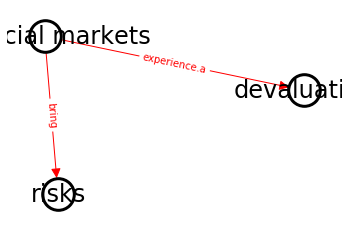

In [50]:
filter_graph(h, 'Financial markets')

In [81]:
draw_kg(gpe_kg)

In [82]:
draw_kg(org_kg)

In [53]:
h

subject         relation  \
0                                         MGI research         combines   
1                                        James Manyika        employing   
2                                                  MGI             have   
3                                             Practice            helps   
4                                        organizations             help   
5                                             McKinsey        developed   
6                                               Quiros         provided   
7                                              Birshan         provided   
8                           Woods Hole Research Center         produced   
9    the University of Oxford’s Environmental Chang...           ensure   
10                                      Carlos Sanchez         SYSTEMIQ   
11                                              number      contributed   
12                                       Organizations          include   
13                                     Multiple groups      contributed   
14                                          colleagues         provided   
15                                        Peter Gumbel            thank   
16          Climate science          humidity increase          devalue   
17                                      Poorer regions             have   
18                                      Climate change  also.illustrate   
19                                    changing climate           impact   
20          average daily maximum wet bulb temperature          defined   
21                                             numbers           do not   
22                                            McKinsey              has   
23                             Climate impact research            makes   
24                                          technology        reshaping   
25                                       uncertainties              see   
26                                        stakeholders              see   
27                                       Exhibit E1.We             make   
28                                         methodology        addresses   
29                                           Emissions        influence   
..                                                 ...              ...   
303                                              cases        represent   
304                               wet bulb temperature           exceed   
305                                       Large cities             push   
306                                         indicators          include   
307                                       CMIP5 models             have   
308                                            results           set to   
309                                          countries             show   
310                                    robust analysis            noted   
311                                              A2.We         identify   
312                                            ability          exposed   
313                                            drought          exposed   
314                                            Country             heat   
315                                              A4.We         identify   
316                                            drought          exposed   
317                                            drought          exposed   
318                                              A6.We         identify   
319                                            drought          exposed   
320                                            Country             heat   
321                                            drought          exposed   
322                                            Climate              Has   
323                                       Final report             made   
324                            Atmospheric                       places 

In [54]:
h2_1 = h[h['subject'].str.contains("climate")]
h2_2 = h[h['object'].str.contains("climate")]
h3 = pd.concat([h2_1, h2_2])
h3

subject             relation  \
19                                    changing climate               impact   
42                                      climate models             indicate   
55                                     climate hazards               impact   
80                                      climate events                 lack   
81                                      climate events              trigger   
82                                    changing climate              affects   
84                        Intensifying climate.hazards                  put   
90                               Köppen climate system              divides   
101                              polar boreal climates  largest increase in   
113                                   changing climate                means   
127                                     climate models                 have   
142                                   changing climate              affects   
151                                     climate models              project   
223                                   changing climate             increase   
233                            Growing climate hazards                  put   
261                              Köppen climate system              divides   
285                  Paris Agreement climate proposals                 need   
294                                     climate change            points to   
17                                      Poorer regions                 have   
29                                           Emissions            influence   
90                               Köppen climate system              divides   
136                       the US Department of Defense           identified   
240                                         economists                treat   
260                                         25 percent          experienced   
261                              Köppen climate system              divides   
266                                              share             changing   
289               The World Climate Research Programme              brought   
296                                             buyers            recognize   
312                                            ability              exposed   
313                                            drought              exposed   
316                                            drought              exposed   
317                                            drought              exposed   
319                                            drought              exposed   
321                                            drought              exposed   
325  Estimated work       model multi-member ensemb...               assess   

                                   object subject_type object_type  
19                  socioeconomic systems   NOUN_CHUNK  NOUN_CHUNK  
42                                   rise   NOUN_CHUNK  NOUN_CHUNK  
55                       multiple systems   NOUN_CHUNK  NOUN_CHUNK  
80                        financial means   NOUN_CHUNK  NOUN_CHUNK  
81                        harvest failure   NOUN_CHUNK  NOUN_CHUNK  
82         human physical natural capital   NOUN_CHUNK  NOUN_CHUNK  
84              millions of lives at risk          ORG    CARDINAL  
90                               climates   NOUN_CHUNK  NOUN_CHUNK  
101                              poleward   NOUN_CHUNK  NOUN_CHUNK  
113                           likelihoods   NOUN_CHUNK  NOUN_CHUNK  
127                        global warming   NOUN_CHUNK  NOUN_CHUNK  
142                 socioeconomic systems   NOUN_CHUNK  NOUN_CHUNK  
151                                  rise   NOUN_CHUNK  NOUN_CHUNK  
223                             migration   NOUN_CHUNK  NOUN_CHUNK  
233                     millions of lives   NOUN_CHUNK    CARDINAL  
261                              climates   NOUN_CHUNK  NOUN_CHUNK  
285                          

In [55]:
draw_kg(h3)

In [56]:
def get_entities(sent):
  ## chunk 1
  ent1 = ""
  ent2 = ""

  prv_tok_dep = ""    # dependency tag of previous token in the sentence
  prv_tok_text = ""   # previous token in the sentence

  prefix = ""
  modifier = ""

  #############################################################
  
  for tok in nlp(sent):
    ## chunk 2
    # if token is a punctuation mark then move on to the next token
    if tok.dep_ != "punct":
      # check: token is a compound word or not
      if tok.dep_ == "compound":
        prefix = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          prefix = prv_tok_text + " "+ tok.text
      
      # check: token is a modifier or not
      if tok.dep_.endswith("mod") == True:
        modifier = tok.text
        # if the previous word was also a 'compound' then add the current word to it
        if prv_tok_dep == "compound":
          modifier = prv_tok_text + " "+ tok.text
      
      ## chunk 3
      if tok.dep_.find("subj") == True:
        ent1 = modifier +" "+ prefix + " "+ tok.text
        prefix = ""
        modifier = ""
        prv_tok_dep = ""
        prv_tok_text = ""      

      ## chunk 4
      if tok.dep_.find("obj") == True:
        ent2 = modifier +" "+ prefix +" "+ tok.text
        
      ## chunk 5  
      # update variables
      prv_tok_dep = tok.dep_
      prv_tok_text = tok.text
  #############################################################

  return [ent1.strip(), ent2.strip()]

In [57]:
doc = nlp(k)

In [58]:
sentences_list = [sent for sent in doc.sents]

In [59]:
len(sentences_list)

6304

In [60]:
type(sentences_list[1])

spacy.tokens.span.Span

In [61]:
sentences_list = [str(sentences_list[i]) for i in range(len(sentences_list))]
print(len(sentences_list))
print(type(sentences_list))

6304
<class 'list'>


In [62]:
print(type(sentences_list[1]))

<class 'str'>


In [63]:
sentences_list = list(filter(None, sentences_list))

In [64]:
import tqdm
entity_pairs = []

for i in range(len(sentences_list)):
  entity_pairs.append(get_entities(sentences_list[i]))

In [65]:
def get_relation(sent):

  doc = nlp(sent)

  # Matcher class object 
  matcher = Matcher(nlp.vocab)

  #define the pattern 
  pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

  matcher.add("matching_1", None, pattern) 

  matches = matcher(doc)
  k = len(matches) - 1

  span = doc[matches[k][1]:matches[k][2]] 

  return(span.text)



In [66]:
import spacy
from spacy.matcher import Matcher 
from spacy.tokens import Span 
import networkx as nx
import matplotlib.pyplot as plt
relations = [get_relation(sentences_list[i]) for i in range(len(sentences_list))]

In [67]:
# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df2 = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [68]:
G=nx.from_pandas_edgelist(kg_df2, "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

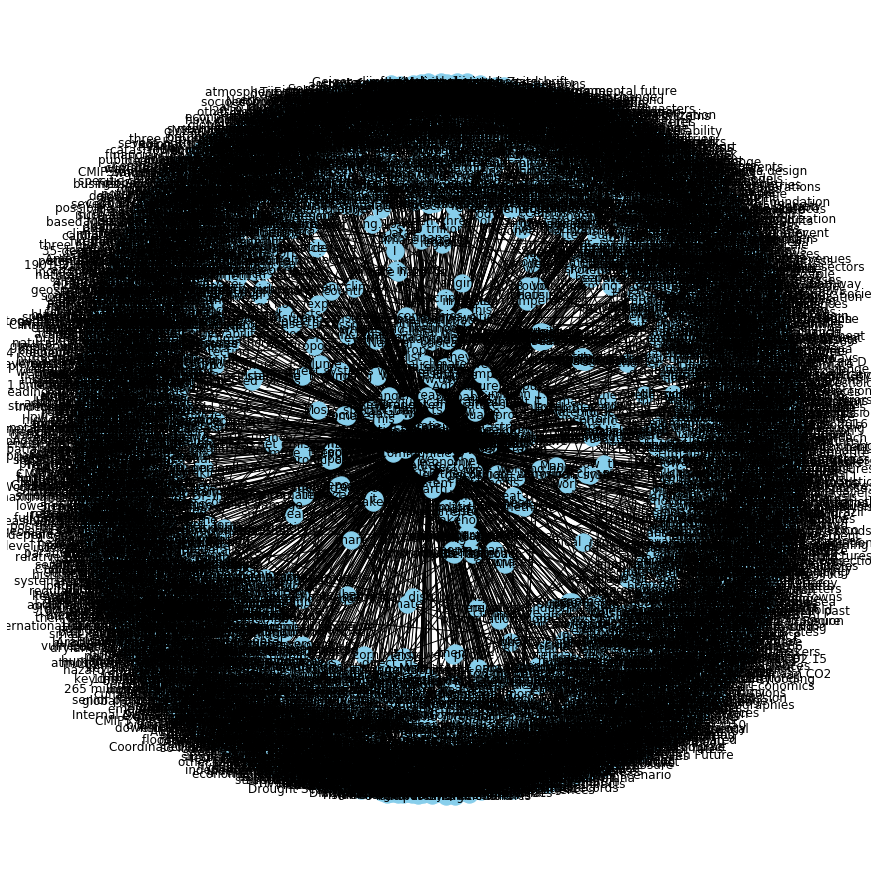

In [69]:
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [70]:
kg_df2.head(20)

source                    target        edge
0                                                            risk
1                                                         hazards
2                                                         January
3                                                       Institute
4                                                1990       Since
5          Recent  partners    digital Global experts   sought to
6            deeper  impact   global McKinsey economy        made
7      economic Michael MGI  Chinese Rajat management    includes
8                                                           Hazan
9                                                           Tonby
10                      MGI           three  McKinsey      led by
11     senior James Manyika          impact Sven Smit        help
12                                           findings    research
13        analytical  tools     chairs decision world    serve as
14                                   business leaders          In
15                                                MGI         Our
16  micro Susan methodology              MGI research      advise
17                                                         trends
18                       it            public  policy  understand
19                      MGI            senior  fellow        have

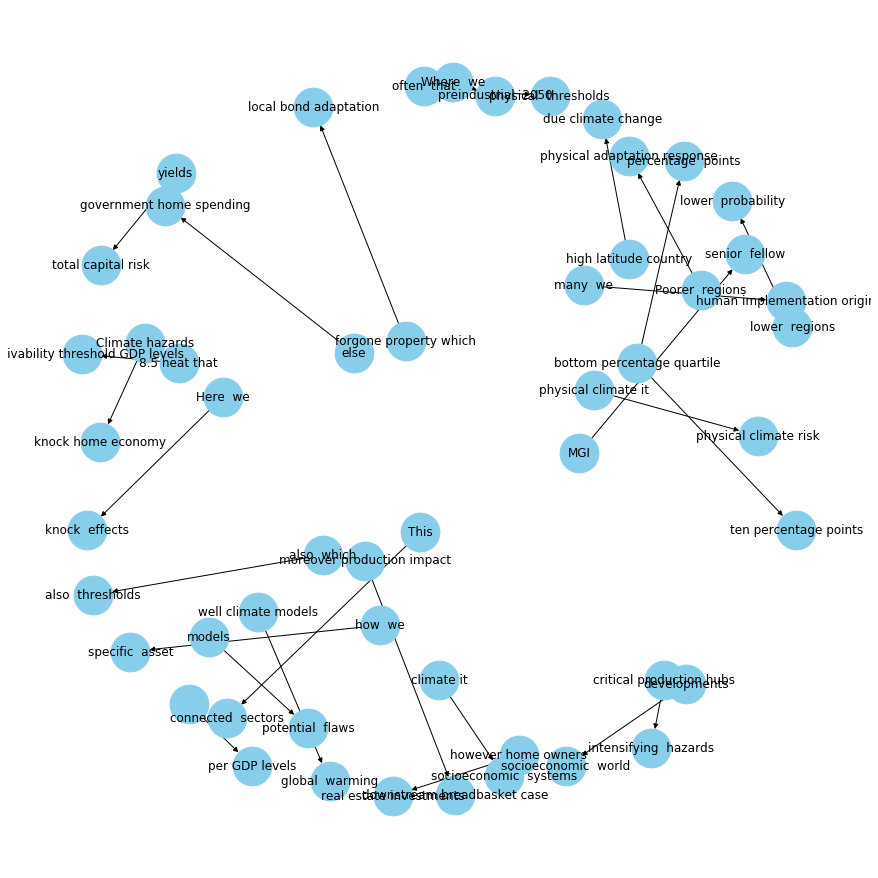

In [71]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['edge']=="have"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [72]:
len(kg_df2)

6304

In [73]:
edge_count = kg_df2.groupby("edge").size()
edge_count = edge_count.to_frame(name='size').sort_values(by = 'size', ascending=False).reset_index()
edge_count.head(20)

edge  size
0          is   151
1        risk    77
2     hazards    71
3         are    66
4    expected    66
5         See    61
6    increase    61
7           .    50
8     include    46
9        need    45
10       Note    43
11      Issue    43
12  Institute    42
13     Source    40
14          2    38
15  projected    37
16          1    37
17  corrected    36
18         be    35
19          3    31

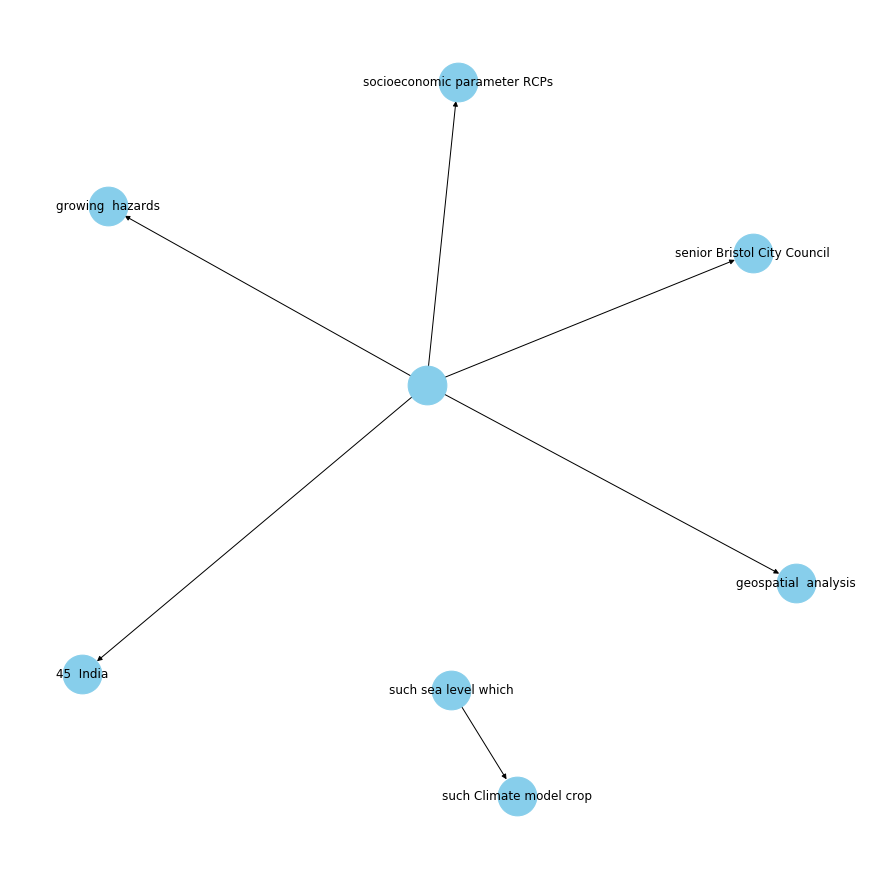

In [74]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['edge']=="hazards"], "source", "target", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [75]:
source_count = kg_df2.groupby("source").size()
source_count = source_count.to_frame(name='size').sort_values(by = 'size', ascending=False).reset_index()
source_count.head(20)

source  size
0                             3528
1                         We    98
2                         we    72
3                       This    51
4               standard  we    32
5             Heat data bias    28
6                       that    28
7              Climate state    27
8           why Technical we    23
9                         it    21
10               projections    21
11                        us    18
12                      Risk    16
13              Water stress    15
14              ° C wet bulb    15
15                      They    15
16                 threshold    13
17       annual  probability    13
18               Risk values    12
19  Water stress projections    12

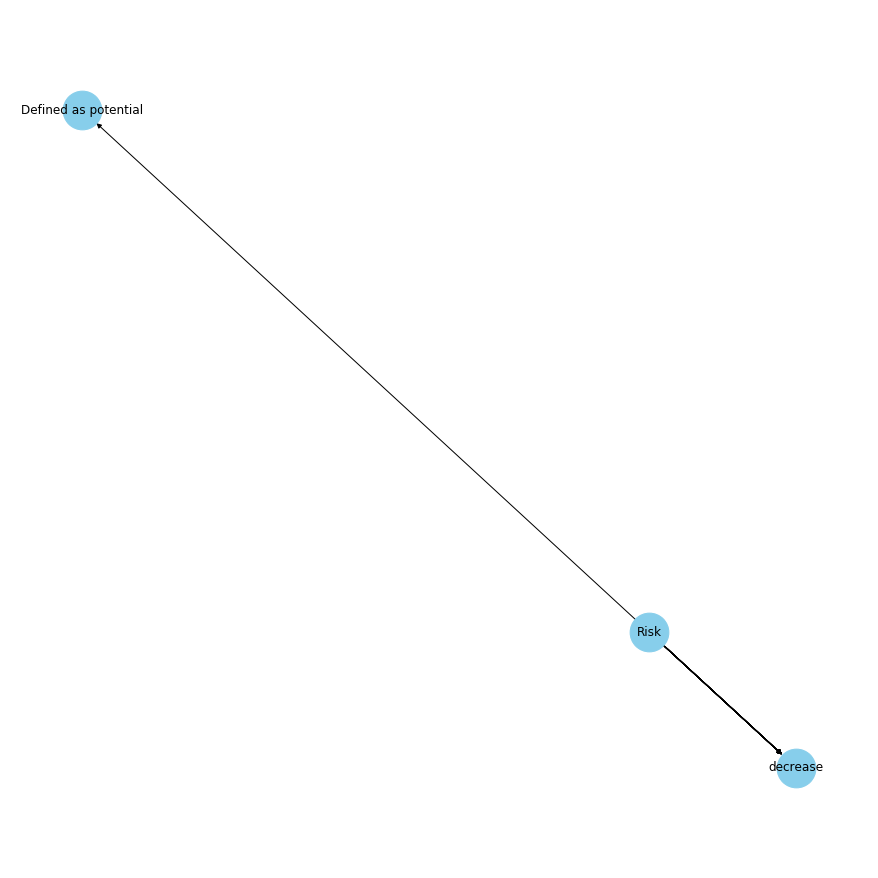

In [76]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['source']=="Risk"], "source", "edge", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

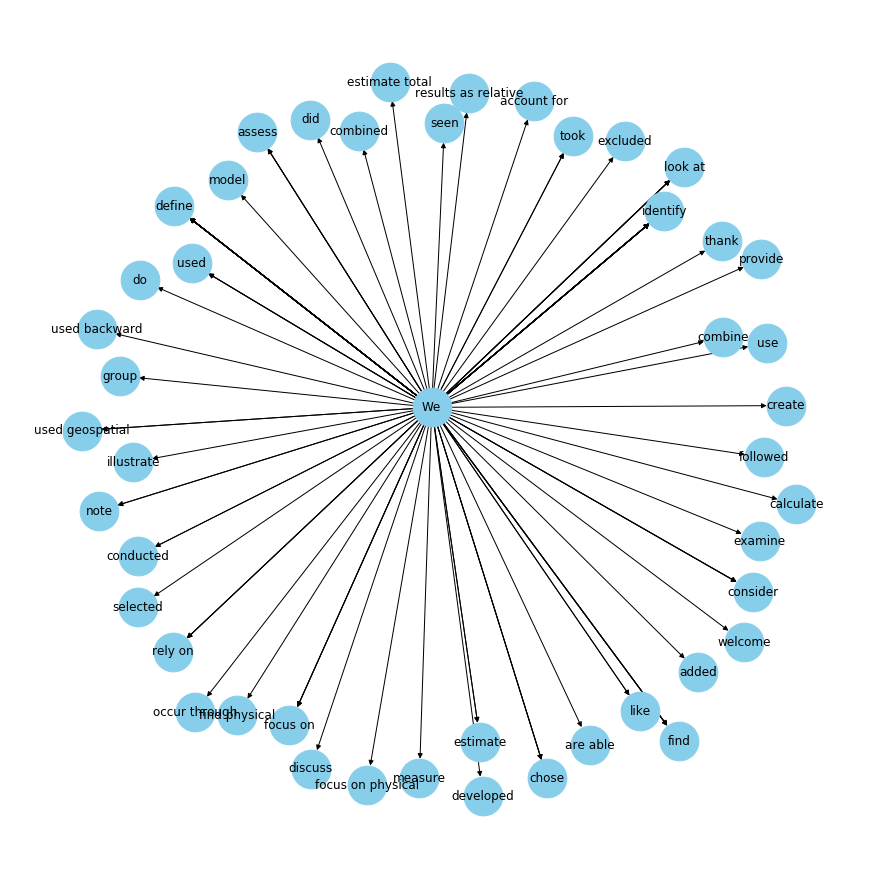

In [77]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['source']=="We"], "source", "edge", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [78]:
target_count = kg_df2.groupby("target").size()
target_count = target_count.to_frame(name='size').sort_values(by = 'size', ascending=False).reset_index()
target_count.head(20)

target  size
0                                 2740
1                            RCP    61
2                 climate change    35
3   climatic multidecade periods    31
4                  average  2041    29
5                           risk    21
6          atmospheric  aerosols    20
7               35 ° C threshold    15
8              changing  climate    15
9                  annual  water    13
10                         group    12
11                weighted  risk    12
12     low projection robustness    12
13                       climate    12
14                  ° C wet bulb    12
15           8.5 climate impacts    12
16        socioeconomic  systems    11
17         physical climate risk    10
18                    adaptation    10
19                  Other  group    10

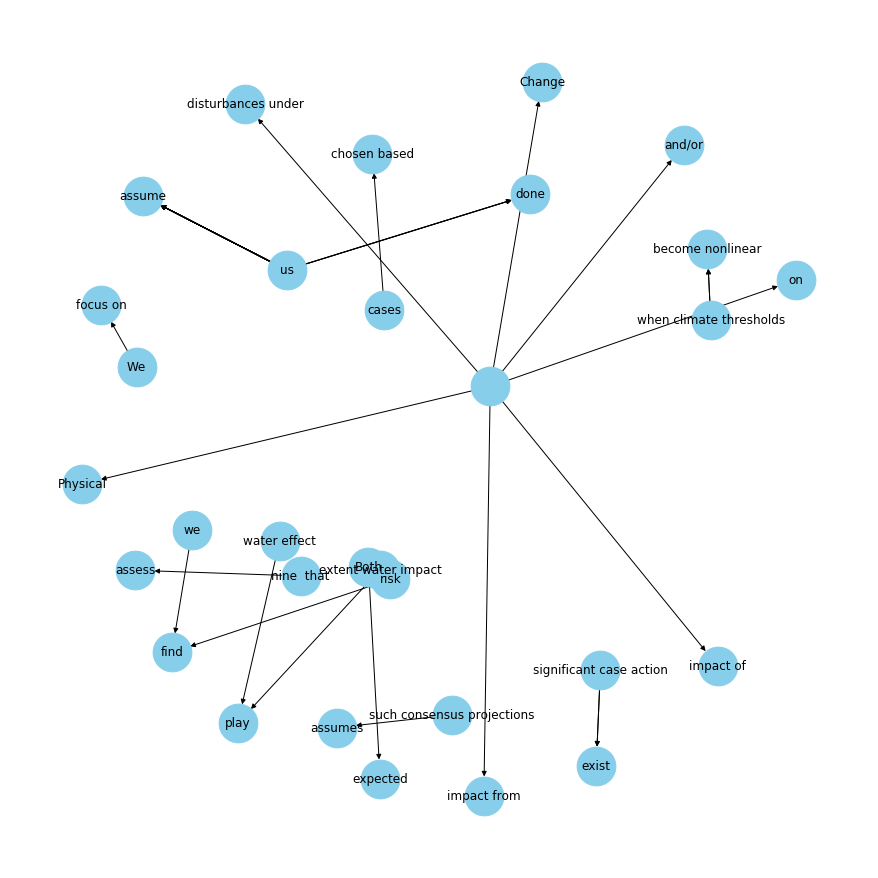

In [79]:
G=nx.from_pandas_edgelist(kg_df2[kg_df2['target']=="climate change"], "source", "edge", 
                          edge_attr=True, create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k = 0.5)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_cmap=plt.cm.Blues, pos = pos)
plt.show()